# Time Series vs Supervised Learning

In [1]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import datetime
from pandas import Series
import matplotlib.pyplot as plt

C:\Users\admin\anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


# Zadanie
Wczytaj dane "Monthly Car Sales Dataset", które pisują liczbę sprzedanych samochodów w Quebec, Kanada w latach 1960 i 1968.

In [2]:
series = pd.read_csv('.\monthly-car-sales-in-quebec-1960.csv', index_col = 'Month', squeeze = True, parse_dates=['Month'])

print(series.head(5))

Month
1960-01-01     6550
1960-02-01     8728
1960-03-01    12026
1960-04-01    14395
1960-05-01    14587
Name: Monthly car sales in Quebec 1960-1968, dtype: int64


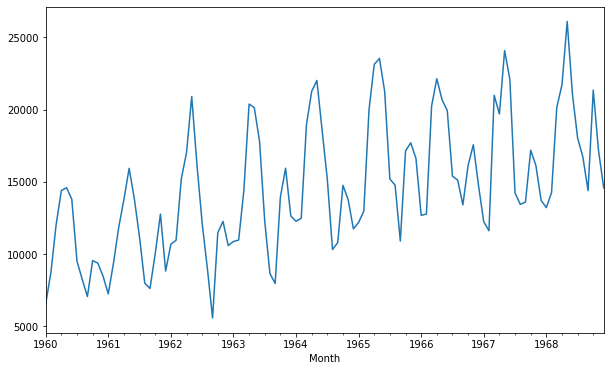

In [3]:
plt.figure(figsize=(10,6));
series.plot()
plt.show()

In [4]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning dataset.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in: Number of lag observations as input (X).
        n_out: Number of observations as output (y).
        dropnan: Boolean whether or not to drop rows with NaN values.
    Returns:
        Pandas DataFrame of series framed for supervised learning.
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [5]:
series.values

array([ 6550,  8728, 12026, 14395, 14587, 13791,  9498,  8251,  7049,
        9545,  9364,  8456,  7237,  9374, 11837, 13784, 15926, 13821,
       11143,  7975,  7610, 10015, 12759,  8816, 10677, 10947, 15200,
       17010, 20900, 16205, 12143,  8997,  5568, 11474, 12256, 10583,
       10862, 10965, 14405, 20379, 20128, 17816, 12268,  8642,  7962,
       13932, 15936, 12628, 12267, 12470, 18944, 21259, 22015, 18581,
       15175, 10306, 10792, 14752, 13754, 11738, 12181, 12965, 19990,
       23125, 23541, 21247, 15189, 14767, 10895, 17130, 17697, 16611,
       12674, 12760, 20249, 22135, 20677, 19933, 15388, 15113, 13401,
       16135, 17562, 14720, 12225, 11608, 20985, 19692, 24081, 22114,
       14220, 13434, 13598, 17187, 16119, 13713, 13210, 14251, 20139,
       21725, 26099, 21084, 18024, 16722, 14385, 21342, 17180, 14577],
      dtype=int64)

In [6]:
df = pd.DataFrame()
df['t'] = [x for x in series]
dataframe = series_to_supervised(df, 12)
dataframe.head()

,var1(t-12),var1(t-11),var1(t-10),var1(t-9),var1(t-8),var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
12,6550.0,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237
13,8728.0,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374
14,12026.0,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837
15,14395.0,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784
16,14587.0,13791.0,9498.0,8251.0,7049.0,9545.0,9364.0,8456.0,7237.0,9374.0,11837.0,13784.0,15926


# RandomForestRegressor
Możemy użyć regresji aby przewidzieć wartość w szeregu czasowym. 

In [8]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=1, verbose=0, warm_start=False)

In [10]:
model.predict(X[0:2,0:])

array([8196.212, 9440.292])

# Feature selection
Algorytm RandomForestRegressor nadaje wagi współrzędnym użytym w uczeniu odzwierciedlające ich wpływ na proces uczenia.

Index(['var1(t-12)', 'var1(t-11)', 'var1(t-10)', 'var1(t-9)', 'var1(t-8)',
       'var1(t-7)', 'var1(t-6)', 'var1(t-5)', 'var1(t-4)', 'var1(t-3)',
       'var1(t-2)', 'var1(t-1)', 'var1(t)'],
      dtype='object')
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[0.86479833 0.01387618 0.00674955 0.01154818 0.01397524 0.0191345
 0.01805107 0.01027828 0.01164456 0.00754838 0.00983961 0.01255612]


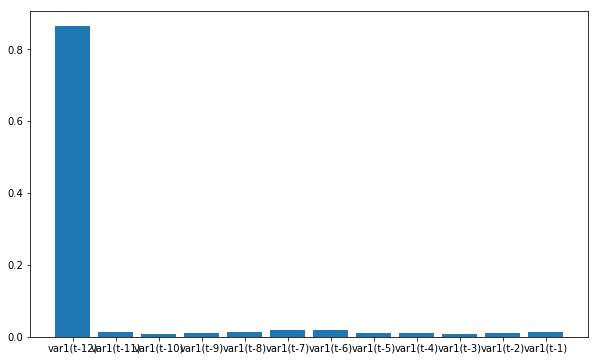

In [11]:
# plot importance scores
names = dataframe.columns
print(names)
ticks = [i for i in range(len(names)-1)]
print(ticks)
print(model.feature_importances_)
plt.figure(figsize=(10,6));
plt.bar(ticks, model.feature_importances_)
plt.xticks(ticks, names)
plt.show()

# RFE
Możemy również użyć funkcji wyboru, aby automatycznie określić i wybrać te wprowadzania, które są najważniejsze.

Popularna metoda współrzędnych jest <b>Feature ranking with recursive feature elimination</b> (RFE).
RFE działa poprzez tworzenie modeli predykcyjnych, ważenia i przycinania tych najmniej ważnych, a następnie powtarzanie procesu, aż pozostanie pożądana liczba współrzędnych.


In [12]:
from sklearn.feature_selection import RFE

rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

In [13]:
# report selected features
print('Selected Features:')
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])


Selected Features:
var1(t-12)
var1(t-8)
var1(t-7)
var1(t-6)


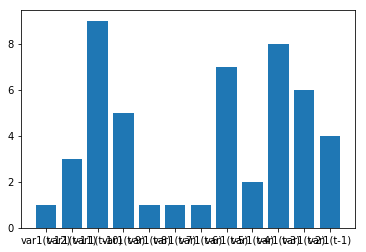

In [14]:
# plot feature rank
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
plt.bar(ticks, fit.ranking_)
plt.xticks(ticks, names)
plt.show()